# Post-processing 3D U-Net Predictions

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label

In [3]:
with h5py.File("/g/kreshuk/yu/Datasets/TMody2021Ovules/test_xyds2/1707_predictions.h5", 'r') as f:
    print(f.keys())
    predictions = f['predictions'][:]
    foreground = predictions[0]
    boundary = predictions[1]

<KeysViewHDF5 ['predictions']>


In [5]:
nucleus_binary = (foreground - boundary) > 0.5
nucleus_segmentation = label(nucleus_binary)

In [8]:
nucleus_segmentation.shape

(430, 784, 784)

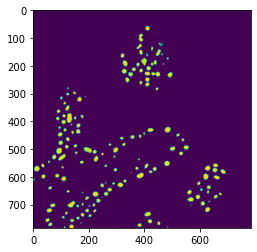

In [9]:
plt.imshow(nucleus_segmentation[200])

In [13]:
with h5py.File("/g/kreshuk/yu/Datasets/TMody2021Ovules/test_xyds2/1707_segmentation.h5", 'w') as f:
    f.create_dataset("segmentation", data=nucleus_segmentation.astype('float32'), compression='gzip')